## Boosting

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# 1. Load dataset

PATH = "/Users/moritzknodler/Documents/00_Lectures/0_Fall 2025/ML/z_Project/Flight data/thermals/thermals_weather_PCA_clusters.csv"
 
df = pd.read_csv(PATH)

print("Original rows:", len(df))
print("Original columns:", len(df.columns))

weather_cols = [
    "temperature_2m",
    "dewpoint_2m",
    "windspeed_10m",
    "winddirection_10m",
    "cloudcover_low",
    "cloudcover_mid",
    "cloudcover_high",
    "shortwave_radiation",
    "boundary_layer_height"
]

# Target label
label_col = ["cluster"]

# Final selection (choose with or without PCA)
df = df[weather_cols + label_col].copy()

print("Filtered columns:", df.columns.tolist())
print("Filtered rows:", len(df))

display(df.head())

print("Rows:", len(df))
display(df.sample(5))

Original rows: 7868
Original columns: 37
Filtered columns: ['temperature_2m', 'dewpoint_2m', 'windspeed_10m', 'winddirection_10m', 'cloudcover_low', 'cloudcover_mid', 'cloudcover_high', 'shortwave_radiation', 'boundary_layer_height', 'cluster']
Filtered rows: 7868


,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height,cluster
0,1.8,-9.1,3.7,349.0,0.0,0.0,0.0,545.0,355.0,3
1,0.9,-10.0,3.7,349.0,0.0,0.0,0.0,545.0,355.0,5
2,2.0,-8.9,3.7,349.0,0.0,0.0,0.0,545.0,255.0,5
3,2.6,-11.0,3.3,6.0,0.0,0.0,0.0,522.0,250.0,5
4,2.6,-11.0,3.3,6.0,0.0,0.0,0.0,522.0,250.0,5


Rows: 7868


,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height,cluster
30,7.6,-2.9,6.6,347.0,0.0,0.0,0.0,509.0,900.0,5
5366,22.7,7.5,7.4,321.0,0.0,20.0,0.0,757.0,1820.0,5
1084,21.0,4.4,6.9,279.0,0.0,0.0,0.0,916.0,1865.0,3
7253,20.2,11.4,4.7,356.0,2.0,4.0,0.0,732.0,1820.0,5
645,20.1,4.6,2.9,180.0,1.0,6.0,69.0,840.0,1435.0,3


In [8]:
# 3. Train/test split

# --- Target variable corrected for XGBoost ---
y = df["cluster"].astype(int) - 1   # 1–5 → 0–4

X = df[weather_cols]

X_train, X_pred, y_train, y_pred = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

display(X_train.head())
display(y_train.head())

display(X_pred.head())
display(y_pred.head())


# --- Show split summary ---
print("\n📊 Train/Test Split Summary")
print(f"Train rows: {len(X_train):,} ({100*len(X_train)/len(df):.1f}%)")
print(f"Test rows : {len(X_pred):,}  ({100*len(X_pred)/len(df):.1f}%)")

# Cluster distribution in original dataset
print("\n📌 Cluster distribution (original full dataset):")
print(y.value_counts(normalize=True).mul(100).round(1).sort_index(), "\n")

# Cluster distribution in train set
print("📌 Cluster distribution (train set):")
print(y_train.value_counts(normalize=True).mul(100).round(1).sort_index(), "\n")

# Cluster distribution in test set
print("📌 Cluster distribution (test set):")
print(y_pred.value_counts(normalize=True).mul(100).round(1).sort_index())

,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height
7577,24.5,12.2,3.8,343.0,0.0,7.0,1.0,786.0,1490.0
162,10.9,-3.6,5.5,23.0,0.0,0.0,0.0,730.0,1425.0
7661,22.0,10.5,5.7,18.0,4.0,33.0,0.0,737.0,1005.0
2499,17.7,8.3,4.8,103.0,0.0,0.0,0.0,750.0,1900.0
6083,10.1,-2.4,3.0,256.0,0.0,0.0,26.0,851.0,0.0


7577    4
162     2
7661    2
2499    2
6083    1
Name: cluster, dtype: int64

,temperature_2m,dewpoint_2m,windspeed_10m,winddirection_10m,cloudcover_low,cloudcover_mid,cloudcover_high,shortwave_radiation,boundary_layer_height
2592,19.4,4.1,5.4,233.0,4.0,0.0,0.0,732.0,2210.0
4939,6.1,-2.6,4.3,275.0,1.0,0.0,0.0,948.0,1565.0
5192,15.0,4.5,6.7,306.0,6.0,70.0,96.0,760.0,1655.0
4414,16.4,4.5,7.0,339.0,0.0,18.0,0.0,818.0,1885.0
1289,18.8,10.9,4.0,270.0,0.0,36.0,0.0,526.0,1010.0


2592    0
4939    2
5192    0
4414    2
1289    3
Name: cluster, dtype: int64


📊 Train/Test Split Summary
Train rows: 5,901 (75.0%)
Test rows : 1,967  (25.0%)

📌 Cluster distribution (original full dataset):
cluster
0    28.3
1    10.2
2    19.3
3     9.3
4    32.9
Name: proportion, dtype: float64 

📌 Cluster distribution (train set):
cluster
0    28.3
1    10.2
2    19.3
3     9.3
4    32.9
Name: proportion, dtype: float64 

📌 Cluster distribution (test set):
cluster
0    28.3
1    10.2
2    19.3
3     9.4
4    32.9
Name: proportion, dtype: float64


In [ ]:
# 3. Hyperparameter Tuning with Randomized Search

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [200, 300, 400, 600],
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "max_depth": [3, 4, 5, 6],
    "subsample": [0.6, 0.7, 0.8, 0.9],
    "colsample_bytree": [0.6, 0.7, 0.8, 0.9],
    "gamma": [0, 1, 2, 5],
    "reg_lambda": [1, 3, 5, 10],
}

xgb = XGBClassifier(
    objective="multi:softmax",
    num_class=5,
    eval_metric="mlogloss",
    n_jobs=-1,
    random_state=42
)

rs = RandomizedSearchCV(
    xgb,
    param_distributions=param_grid,
    n_iter=25,
    scoring="f1_macro",
    cv=3,
    verbose=1,
    n_jobs=-1
)

rs.fit(X_train, y_train)

print("Best parameters:", rs.best_params_)
print("Best CV score:", rs.best_score_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters: {'subsample': 0.8, 'reg_lambda': 3, 'n_estimators': 600, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
Best CV score: 0.34633747520720576


In [13]:
# 4. Train XGBoost Classifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize model
xgb_model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.6,
    gamma=0,
    reg_lambda=3,
    objective="multi:softmax",
    num_class=5,
    eval_metric="mlogloss",
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_pred)



🎯 XGBoost Performance
---------------------------
Accuracy: 0.488
Macro F1: 0.358

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.61      0.57       557
           1       0.32      0.18      0.23       200
           2       0.28      0.22      0.24       379
           3       0.15      0.07      0.09       184
           4       0.59      0.75      0.66       647

    accuracy                           0.49      1967
   macro avg       0.37      0.37      0.36      1967
weighted avg       0.44      0.49      0.46      1967



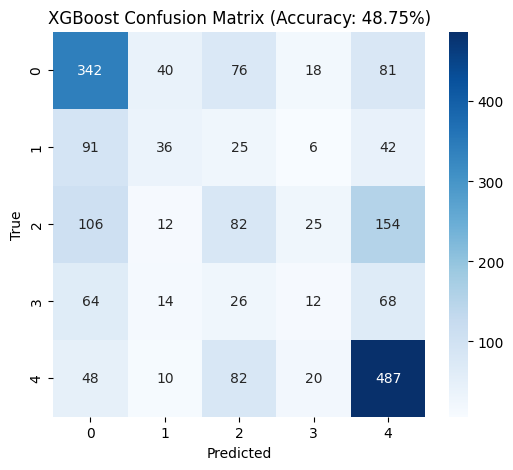

In [15]:

# 5. Evaluation

print("\n🎯 XGBoost Performance")
print("---------------------------")
print(f"Accuracy: {accuracy_score(y_pred, y_pred_xgb):.3f}")
print(f"Macro F1: {f1_score(y_pred, y_pred_xgb, average='macro'):.3f}\n")

print("Classification Report:")
print(classification_report(y_pred, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_pred, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix (Accuracy: {:.2f}%)".format(100*accuracy_score(y_pred, y_pred_xgb)))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()



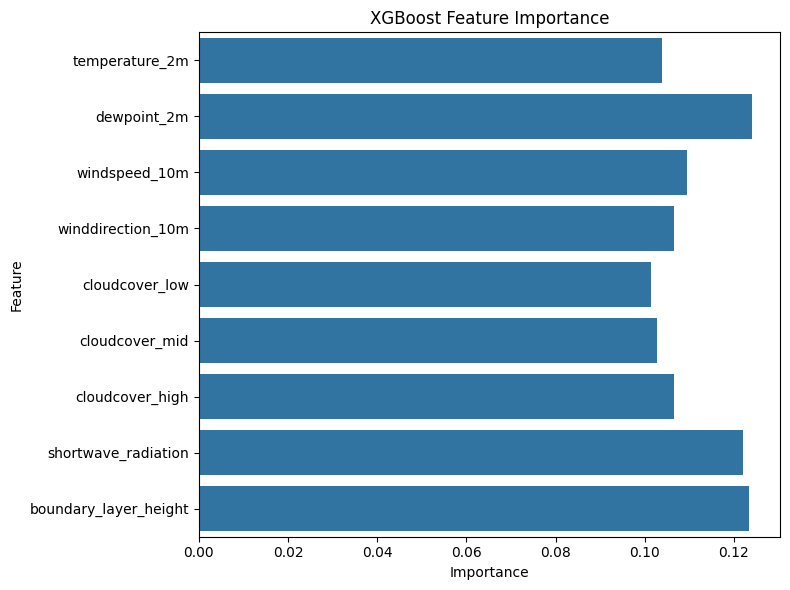

In [11]:
# ============================
# 6. Feature Importance
# ============================

plt.figure(figsize=(8, 6))
sns.barplot(
    x=xgb_model.feature_importances_,
    y=weather_cols,
)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()